# Morphology Module: Part 2 for CNS tutorial
-----

*Load morphologies that were downloaded, analyze them, and compare species.*

For the first part of the tutorial, the user downloaded 20 mouse morphologies, 20 rat morphologies, and 20 human morphologies. We saved these neurons locally in two different folders. The data will now be used for the analysis between the species. We will visualize some example morphologies and we will use NeuroM for some basic morphometric analysis. 

## 2.1 Use NeuroM to load morphologies

We will use NeuroM (https://github.com/openbraininstitute/NeuroM) for the analysis of the morphologies. This is a user-friendly tool to download morphologies, visualize them quickly and extract morphometrics, such as lengths, number of branches, and bifurcation angles. For more details, the complete documentation of the tool can be found: https://neurom.readthedocs.io/en/latest/?badge=latest.

In [1]:
import neurom as nm
from neurom import view
from matplotlib import pylab as plt
import numpy as np

In [2]:
Rat_morphologies = nm.load_morphologies('Rat/')

In [3]:
Mouse_morphologies = nm.load_morphologies('Mouse/')

In [4]:
Human_morphologies = nm.load_morphologies('Human/')

## 2.2 Plot morphologies

Here we visualize some example morphologies we downloaded. This visualization is for illustration purposes only, exploring our data. It is not meant to be used for a proper scientific paper ready figure. 

In [5]:
rat_neuron = list(Rat_morphologies.morphologies)[0]

mouse_neuron = list(Mouse_morphologies.morphologies)[0]

human_neuron = list(Human_morphologies.morphologies)[0]

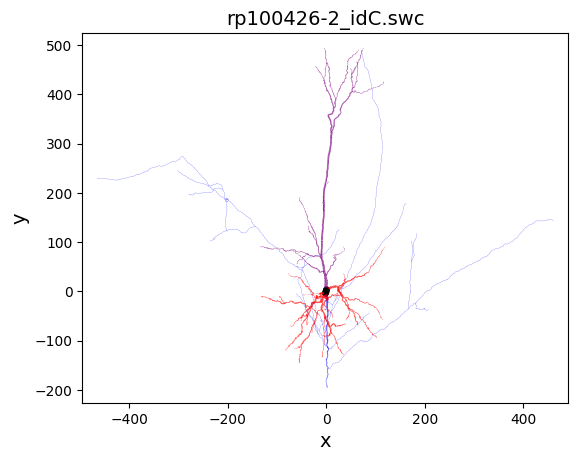

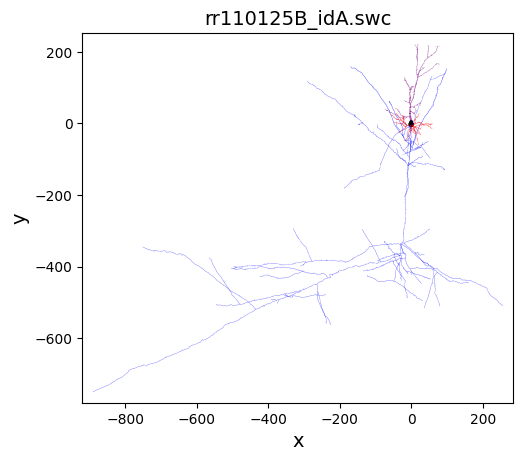

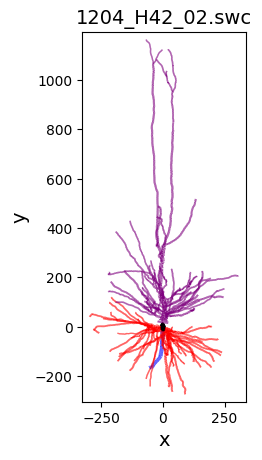

In [6]:
view.plot_morph(rat_neuron)
view.plot_morph(mouse_neuron)
view.plot_morph(human_neuron)

Text(0.5, 1.0, 'Human morphology')

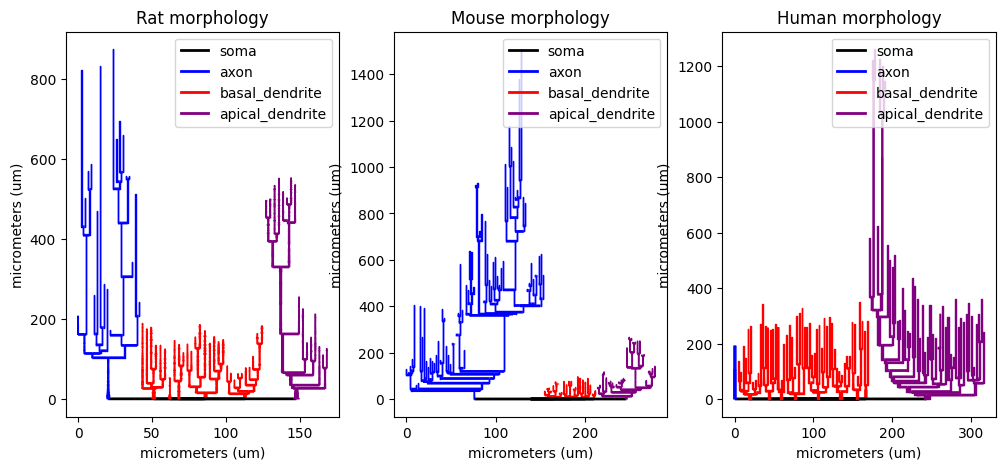

In [9]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(131)
view.plot_dendrogram(rat_neuron, ax=ax)
ax.set_title("Rat morphology")
ax = fig.add_subplot(132)
view.plot_dendrogram(mouse_neuron, ax=ax)
ax.set_title("Mouse morphology")
ax = fig.add_subplot(133)
view.plot_dendrogram(human_neuron, ax=ax)
ax.set_title("Human morphology")

## 2.3 Morphological Analysis

The basic morphological analysis consists of extracting some morohological features. Here we will extract the features in dataframes, and we will use the dataframes to compare species infromation. Finally, we will run a statistical analysis on an example distribution to see how we can further analyze the differences on a specific aspect. 

### Morphological Features full list

**Morphology**

* aspect_ratio
* circularity
* length_fraction_above_soma
* max_radial_distance
* neurite_volume_density
* number_of_neurites
* number_of_sections_per_neurite
* section_bif_radial_distances
* section_radial_distances
* section_term_radial_distances
* segment_radial_distances
* shape_factor
* sholl_crossings
* sholl_frequency
* soma_radius
* soma_surface_area
* soma_volume
* total_area_per_neurite
* total_depth
* total_height
* total_length_per_neurite
* total_volume_per_neurite
* total_width
* trunk_angles
* trunk_angles_from_vector
* trunk_angles_inter_types
* trunk_origin_azimuths
* trunk_origin_elevations
* trunk_origin_radii
* trunk_section_lengths
* trunk_vectors
* volume_density

**Neurite**

* bifurcation_partitions
* diameter_power_relations
* local_bifurcation_angles
* max_radial_distance
* number_of_bifurcations
* number_of_forking_points
* number_of_leaves
* number_of_sections
* number_of_segments
* partition_asymmetry
* partition_asymmetry_length
* partition_pairs
* principal_direction_extents
* remote_bifurcation_angles
* section_areas
* section_bif_branch_orders
* section_bif_lengths
* section_bif_radial_distances
* section_branch_orders
* section_end_distances
* section_lengths
* section_path_distances
* section_radial_distances
* section_strahler_orders
* section_taper_rates
* section_term_branch_orders
* section_term_lengths
* section_term_radial_distances
* section_tortuosity
* section_volumes
* segment_areas
* segment_lengths
* segment_meander_angles
* segment_midpoints
* segment_path_lengths
* segment_radial_distances
* segment_radii
* segment_taper_rates
* segment_volumes
* sibling_ratios
* terminal_path_lengths
* total_area
* total_length
* total_volume
* volume_density

### Morphological Analysis Dataframe 

In [10]:
from neurom.apps import morph_stats, morph_check

In [11]:
conf = nm.apps.morph_stats.get_config(nm.apps.morph_stats.EXAMPLE_STATS_CONFIG, nm.apps.morph_stats.EXAMPLE_STATS_CONFIG)

In [12]:
conf = {'neurite': {'section_lengths': ['max', 'sum'],
                    'number_of_sections': ['sum'],
                    'section_branch_orders': ['max']},
        'neurite_type': ['APICAL_DENDRITE', 'BASAL_DENDRITE'],
        'morphology': {'soma_radius': ['mean']}}

In [13]:
df_R = morph_stats.extract_dataframe(Rat_morphologies, conf)

In [14]:
df_M = morph_stats.extract_dataframe(Mouse_morphologies, conf)

In [15]:
df_H = morph_stats.extract_dataframe(Human_morphologies, conf)

In [16]:
df_R.compare(df_M)

property                              \
                             name                               
                             self                       other   
0              rp100426-2_idC.swc           rr110125B_idA.swc   
1            rp120430_P-2_idC.swc          rp100426-2_idC.swc   
2      rat_20150131_LH2_cell2.swc             C031000B-P3.swc   
3                 C031000B-P3.swc             C280199C-P1.swc   
4                 C260897C-P4.swc    sm110127b1-3_INT_idB.swc   
5      rat_20150120_LH1_cell3.swc  rat_20140212_RH4_cell1.swc   
6   rat_20151211_E2_LH3_cell1.swc  rat_20150217_LH3_cell2.swc   
7                             NaN                         NaN   
8                 C170897A-P2.swc             C220797A-P3.swc   
9            rp120510_P-2_idA.swc  rat_20141024_LH4_cell1.swc   
10               rat_20082013.swc        rp120531_P_2_idA.swc   
11       sm110127b1-3_INT_idA.swc    sm101102a1-8_INT_idA.swc   
12                C190898A-P2.swc        rp120510_P-2_idA.swc   
13                            NaN                         NaN   
14       sm110120c1-2_INT_idD.swc  rat_20150131_LH2_cell3.swc   
15  rat_20150323_E1_LH4_cell1.swc             C240797B-P3.swc   
16                C240797B-P1.swc    sm110120c1-2_INT_idD.swc   
17       sm110131a1-3_INT_idA.swc          mtC221001A_idA.swc   
18     rat_20141016_LH3_cell2.swc        sm100506a1-4_idE.swc   
19                            NaN                         NaN   

       apical_dendrite                                               \
   max_section_lengths             sum_section_lengths                
                  self       other                self        other   
0           167.328156   84.281784         1956.056276  1137.433864   
1           299.009705  110.804710         2633.997607  1295.300401   
2           213.481049  163.418213         3694.057330  1251.497406   
3           246.780701   99.327263         1889.908377  1141.652549   
4           162.403107  141.173431         2049.095135  1967.996296   
5           138.027924  147.010422         1796.570006  2014.926224   
6           252.685974  157.605133         3933.963167  1748.429781   
7           140.817032   93.249039         1870.753743  1238.813120   
8           217.235825  146.523911         1700.435794  1316.170910   
9           178.201660  193.824066         2263.190363  1572.598835   
10          146.110962  174.860657         2565.307190  1008.656176   
11          190.616516  115.585320         2476.535188  2169.256856   
12          141.395889  118.005150         2904.083353  1498.684653   
13          207.517807  137.418289         1725.027897  1142.313399   
14          208.090744  175.669312         1423.123428  1661.975340   
15          116.560722  118.348648         1854.797590  1461.146284   
16          154.894058  137.797699         3205.442736   942.392298   
17          132.321136  116.174797         2596.005147   810.504564   
18          147.098099  145.396515         3404.284668  1631.948018   
19          206.162231  136.520630         1363.289311   902.770148   

                                                                 \
   sum_number_of_sections       max_section_branch_orders         
                     self other                      self other   
0                    31.0  55.0                       9.0   8.0   
1                    40.0  31.0                      11.0   9.0   
2                    47.0  36.0                      10.0   9.0   
3                    36.0  33.0                       9.0  10.0   
4                    33.0  45.0                      13.0  11.0   
5                    37.0  45.0                       9.0  11.0   
6                    59.0  39.0                      12.0  13.0   
7                     NaN   NaN                       NaN   NaN   
8                    29.0  37.0                       7.0  13.0   
9                    35.0  27.0                       8.0   9.0   
10                   45.

In [14]:
df_H.compare(df_M)

property                                             \
                            name                                              
                            self                                      other   
0        0933_RW_20_03_18_S1.swc         493_M34rev_thickness_corrected.swc   
1   0777_H21.29.187.11.46.01.swc          425_171204S1C1N2_with_contour.swc   
2   0801_H20.29.174.11.42.06.swc          461_171205S1C1N1_with_contour.swc   
3    0748_H19.29.161.11.42.2.swc          518_180228S1C1N1_with_contour.swc   
4   0712_H20.29.183.11.91.03.swc          375_171207S2C1N2_with_contour.swc   
5   0756_H20.29.183.11.91.02.swc          481_171205S1C1N3_with_contour.swc   
6   0687_H21.29.187.11.46.02.swc            399_M29_thickness_corrected.swc   
7      0669_H19.29.164.11.22.swc          455_171204S1C1N1_with_contour.swc   
8   0654_H13.058.tv.06.Cel07.swc          362_170512S2C1N2_with_contour.swc   
9   0576_H14.071.tv.03.Cel03.swc         364_M10_01_thickness_corrected.swc   
10     0746_H19.29.161.11.81.swc             445_M1_thickness_corrected.swc   
11   0856_H19.29.161.11.42.3.swc          387_180501S1C1N1_with_contour.swc   
12  0550_H13.059.tv.06.Cel09.swc  441_M11_CORRECTED_thickness_corrected.swc   
13   0640_H19.29.161.11.42.4.swc          470_171205S1C1N2_with_contour.swc   
14  0522_H21.29.187.11.44.02.swc          377_171207S2C1N1_with_contour.swc   
15           0957_H13048TV06.swc  490_M33_corrected_thickness_corrected.swc   
16     0560_SH_2018_02_07_S4.swc          366_170512S2C1N1_with_contour.swc   
17  0602_H13.058.tv.03.Cel03.swc          337_180226S1C1N1_with_contour.swc   
18  0566_H21.29.187.11.41.01.swc          394_180508S1C1N1_with_contour.swc   
19  0618_H21.29.187.11.42.02.swc          397_170512S2C1N3_with_contour.swc   

       apical_dendrite                                               \
   max_section_lengths             sum_section_lengths                
                  self       other                self        other   
0           438.456299  253.055923         7029.847563  2744.768835   
1           579.894531  213.793350         5551.232703  2878.553060   
2           256.738281  470.880188         8478.075058  4409.909878   
3           496.644104  223.919525         4758.208451  3854.012588   
4           375.207520  210.199738         2779.551730  2915.215253   
5           229.988205  401.924469         2928.263663  6145.975171   
6           578.289551  339.049622         6961.558100  3164.402411   
7           311.785095  196.190842         5431.404576  2914.621632   
8           399.148041  158.416382         8252.529799  2263.771606   
9           465.940369  185.592316         8189.478970  2044.661416   
10          633.322754  238.435959         5573.900909  2477.948586   
11          493.235596  171.344086         2536.456994  2372.408987   
12          354.239655  189.362061         5606.847235  3472.148976   
13          355.878967  382.448975         5199.790402  5513.243160   
14          365.595490  185.866058         5706.668303  2060.626312   
15          387.221558  263.389282         6870.453872  2318.342681   
16          221.067429  156.171692         3621.067971  1927.014473   
17          408.450989  195.738861         5537.537162  2045.962417   
18          283.127197  335.832733         6956.487807  1834.402992   
19          196.976654  179.960938         1610.065384  1365.435008   

                                                                 \
   sum_number_of_sections       max_section_branch_orders         
                     self other                      self other   
0                      55    43                        12    11   
1                      53    43                        12     8   
2                      87    37                        15     7   
3                      41    54                        12    13   
4                      28    30                         8     6   
5                      38    54     

### Morphological Analysis Examples

In [17]:
section_lengthsR = nm.get('section_lengths', Rat_morphologies, neurite_type=nm.BASAL_DENDRITE)
section_lengthsM = nm.get('section_lengths', Mouse_morphologies, neurite_type=nm.BASAL_DENDRITE)
section_lengthsH = nm.get('section_lengths', Human_morphologies, neurite_type=nm.BASAL_DENDRITE)

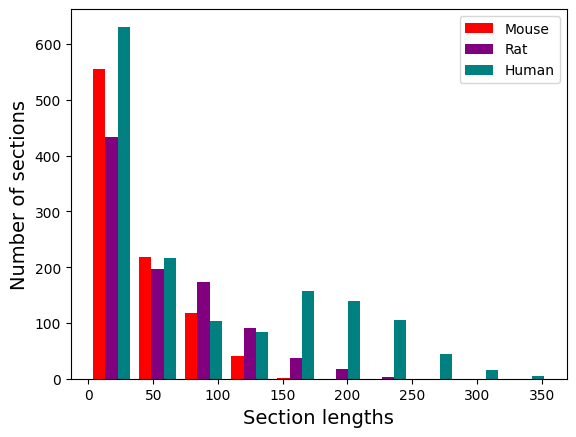

In [18]:
plt.hist([section_lengthsM, section_lengthsR, section_lengthsH], color=['red', 'purple', 'teal'], label=["Mouse", "Rat", "Human"])
_ = plt.legend()
_ = plt.xlabel('Section lengths', fontsize=14)
_ = plt.ylabel('Number of sections', fontsize=14)

### Comparison of two distributions 

Then we can perform statistical tests to determine how different the two distributions are. 

In [19]:
from scipy import stats

In [20]:
stats.ks_2samp(section_lengthsR, section_lengthsM)

KstestResult(statistic=0.180006395143294, pvalue=7.946561907728339e-14, statistic_location=67.85025787353516, statistic_sign=-1)

In [21]:
stats.ks_2samp(section_lengthsR, section_lengthsR)

KstestResult(statistic=0.0, pvalue=1.0, statistic_location=0.6435520648956299, statistic_sign=1)

In [22]:
stats.ks_2samp(section_lengthsR, section_lengthsH)

KstestResult(statistic=0.25638352218007016, pvalue=3.3630264989889965e-34, statistic_location=135.38070678710938, statistic_sign=1)